In [1]:
import pandas as pd 
import os   
import matplotlib.pyplot as plt
import matplotlib 
import time 
from IPython.core.display import display, HTML
import ast
import geopandas as gpd

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
data_oscars

Wall time: 15 ms


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10390,2019,2020,92,WRITING (Original Screenplay),"Screenplay by Bong Joon Ho, Han Jin Won; Story...",Parasite,True
10391,2019,2020,92,JEAN HERSHOLT HUMANITARIAN AWARD,Geena Davis,NaN,True
10392,2019,2020,92,HONORARY AWARD,David Lynch,NaN,True
10393,2019,2020,92,HONORARY AWARD,Wes Studi,NaN,True


In [3]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
# ELIMINAMOS DATOS NULOS
data_oscars = data_oscars.dropna()

# MODIFICAMOS MOMENTANEAMENTE EL NOMBRE PARA PODER GENERAR DATAFRAME
for ind in data_oscars.index:
    film,year = data_oscars['film'][ind],data_oscars['year_film'][ind] 
    data_oscars['film'][ind]=f'{film}[{year}]' 
    
# GENERAMOS UNA LISTA CON CADA PELICULA DISTINTA, DIFERENCIADAS POR SU TITULO Y AÑO PARA NO AGRUPAR REMASTERIZACIONES
movies = []
nominaciones = []
wins = []
for movie in data_oscars['film']:
    if movie not in movies:
        movies.append(movie)

for movie in movies:
    nomin = len(data_oscars[data_oscars['film']==movie])
    nominaciones.append(nomin)
    ganadas = len(data_oscars[(data_oscars['film']==movie)&(data_oscars['winner']==True)])
    wins.append(ganadas)

# GENERAMOS DATAFRAME
diccionario_df = {'Pelicula': movies, 'Nominaciones': nominaciones, 'Premios': wins} 

df = pd.DataFrame(diccionario_df)
#ese es de las nominaciones
df

<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 8.56 s


,Pelicula,Nominaciones,Premios
0,The Noose[1927],1,0
1,The Last Command[1927],2,1
2,A Ship Comes In[1927],1,0
3,7th Heaven[1927],5,3
4,Sadie Thompson[1927],1,0
...,...,...,...
4929,A Sister[2019],1,0
4930,Ad Astra[2019],1,0
4931,Avengers: Endgame[2019],1,0
4932,The Lion King[2019],1,0


In [4]:
%%time
data_ratings = pd.read_csv(os.path.join("ratings_small.csv","ratings_small.csv"))

movies_id = []
ratings = []
cant_ratings = []
for Id in data_ratings['movieId'].unique():
    movies_id.append(Id)
    ratings.append(round(data_ratings[data_ratings['movieId']==Id]['rating'].mean(),1))
    cant_ratings.append(len(data_ratings[data_ratings['movieId']==Id]))

diccionario_ratings = {'IdPelicula': movies_id, 'RatingProm': ratings, 'Cant_Ratings': cant_ratings} 

df_ratings = pd.DataFrame(diccionario_ratings)
df_ratings

Wall time: 5.01 s


,IdPelicula,RatingProm,Cant_Ratings
0,31,3.2,42
1,1029,3.7,42
2,1061,3.5,33
3,1129,3.3,48
4,1172,4.3,46
...,...,...,...
9061,64997,2.5,1
9062,72380,3.5,1
9063,129,3.0,1
9064,4736,1.0,1


In [5]:
data_movies = pd.read_csv(os.path.join("movies_metadata.csv","movies_metadata.csv"))
data_movies.head()

C:\Users\chile\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
# Ocupamos ciertas columnas con las cuales se trabajaran
columns = ['title', 'original_title', 'genres', 'id', 'imdb_id', 'original_language', 'popularity', 'release_date', 'production_countries', 'runtime']
data_movies = data_movies[columns]
#Eliminamos los datos Nulos 
data_movies = data_movies.dropna()
# eliminamos todas las peliculas que no tengan genero
data_movies = data_movies.drop(data_movies[data_movies['genres']== '[]'].index)
# cambiamos el id a int ya que haremos un merge y en el otro dataset se encuentra como variable int64
data_movies['id'] = data_movies['id'].astype('int64')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42797 entries, 0 to 45463
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 42797 non-null  object 
 1   original_title        42797 non-null  object 
 2   genres                42797 non-null  object 
 3   id                    42797 non-null  int64  
 4   imdb_id               42797 non-null  object 
 5   original_language     42797 non-null  object 
 6   popularity            42797 non-null  object 
 7   release_date          42797 non-null  object 
 8   production_countries  42797 non-null  object 
 9   runtime               42797 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.6+ MB


In [7]:
# Merge entre las peliculas y sus ratings
movie_ratings = pd.merge(data_movies, df_ratings, left_on = 'id', right_on = 'IdPelicula', how = 'left')
movie_ratings = movie_ratings.dropna().reset_index(drop=True)
# cambiamos a datetime la columna release_date
movie_ratings.release_date = pd.to_datetime(movie_ratings['release_date'])
# obtenemos el ano de esta columna datetime
movie_ratings["year"] = movie_ratings.release_date.dt.year
print(movie_ratings.shape)
movie_ratings.sort_values('year').head()
# no se ocupa ya que son pocos los datos que quedan luego de hacer el merge

(2798, 14)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,IdPelicula,RatingProm,Cant_Ratings,year
2243,The Arrival of a Train at La Ciotat,L'arrivée d'un train en gare de La Ciotat,"[{'id': 99, 'name': 'Documentary'}]",160,tt0000012,es,5.256608,1896-01-25,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,160.0,2.3,63.0,1896
2797,The One-Man Band,L'Homme orchestre,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",49280,tt0135453,fr,1.109068,1900-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,49280.0,5.0,1.0,1900
1508,A Trip to the Moon,Le Voyage dans la Lune,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",775,tt0000417,fr,6.321801,1902-09-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",14.0,775.0,2.0,1.0,1902
2785,Extraordinary Illusions,Illusions funambulesques,"[{'id': 35, 'name': 'Comedy'}]",127098,tt0223509,fr,0.141611,1903-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2.0,127098.0,4.0,1.0,1903
2202,Frankenstein,Frankenstein,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",2929,tt0001223,en,1.659883,1910-03-18,"[{'iso_3166_1': 'US', 'name': 'United States o...",13.0,2929.0,3.9,14.0,1910


In [8]:
# por lo tanto ocupamos otro dataset en donde tienen mas calificaciones de usuarios para las peliculas
data_ratings_externo = pd.read_csv(os.path.join("ratings_externo","IMDb ratings.csv"))
# columnas que nos serviran
columnas = ['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote']
data_ratings_externo = data_ratings_externo[columnas]
data_ratings_externo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   weighted_average_vote  85855 non-null  float64
 2   total_votes            85855 non-null  int64  
 3   mean_vote              85855 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ MB


In [9]:
# hacemos el merge como antes pero ahora relacionandolo con el imdb_id de cada pelicula
movie_ratings_2 = pd.merge(data_movies, data_ratings_externo, left_on = 'imdb_id', right_on = 'imdb_title_id', how = 'left')
movie_ratings_2 = movie_ratings_2.dropna().reset_index(drop=True)
# convertimos a datetime la columna 'release_date'
movie_ratings_2.release_date = pd.to_datetime(movie_ratings_2['release_date'])
# obtenemos el ano de esto 
movie_ratings_2["year"] = movie_ratings_2.release_date.dt.year
# hacemos una limpieza de los anos, ya que sera comparado con los oscars y estos toman las peliculas desde el ano 1927 
movie_ratings_2 = movie_ratings_2.drop(movie_ratings_2[movie_ratings_2['year'] < 1927].index)
# se puede ver que perdimos menos registros con este dataset, por lo tanto nos quedaremos con el 
print(movie_ratings_2.shape)
movie_ratings_2.head()

(32580, 15)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,imdb_title_id,weighted_average_vote,total_votes,mean_vote,year
0,Toy Story,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1995-10-30,"[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,tt0114709,8.3,864461.0,8.3,1995
1,Jumanji,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1995-12-15,"[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,tt0113497,7.0,299083.0,7.1,1995
2,Grumpier Old Men,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,tt0113228,6.7,23742.0,6.8,1995
3,Waiting to Exhale,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,tt0114885,5.9,9353.0,6.2,1995
4,Father of the Bride Part II,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,1995-02-10,"[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,tt0113041,6.1,33587.0,6.2,1995


In [10]:
# necesitamos los generos para crear un dataframe y hacer un grafico para lograr hacer un analisis de los datos 
genres = movie_ratings_2['genres']
genre_movie = []
generos_totales = []
for i in genres:
    genre = ''
    generos_pelicula = i.split("'")[5::6]
    for j in generos_pelicula:
        if j not in generos_totales:
            generos_totales.append(j)
    for x in range(len(generos_pelicula)):
        if x < len(generos_pelicula) -1:
            genre+=f'{generos_pelicula[x]},'
        else:
            genre+=generos_pelicula[x]
    genre_movie.append(genre)
movie_ratings_2['genres'] = genre_movie

In [11]:
# creamos un dataframe con todos los generos y cada columna si tiene un 0 quiere decir que la pelicula no pertenece a ese genero, si tiene un 1 quiere decir que pertenece la pelicula a ese genero
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas por ano se filman para cada genero 
df_genre['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas
genero_peliculas_ano = df_genre.groupby('year').sum()
# hacemos sort para ver el grafico en orden
genero_peliculas_ano_sumados = genero_peliculas_ano.sum().sort_values(ascending=False)

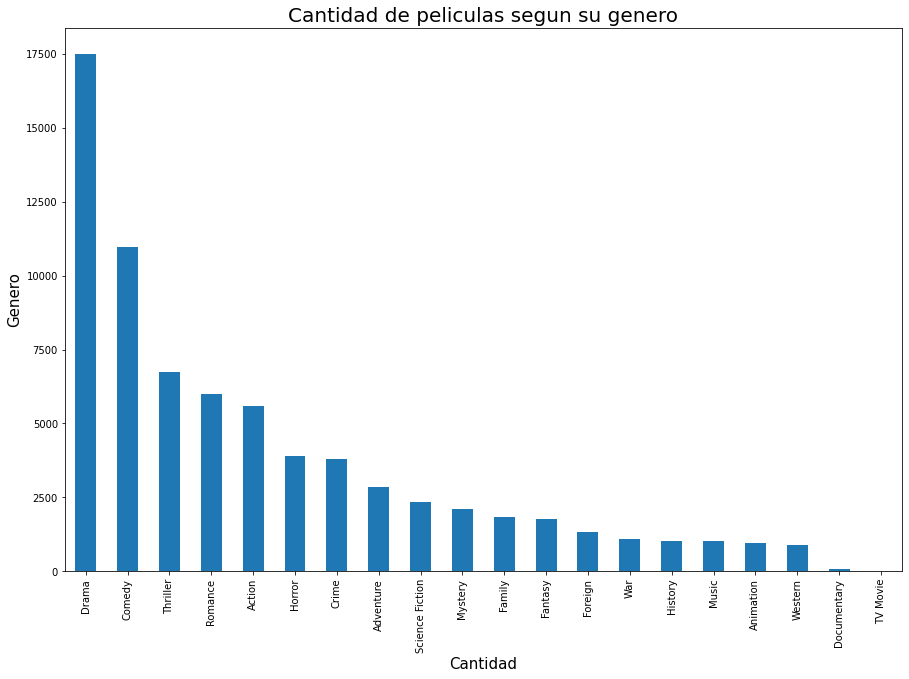

In [12]:
#grafico de cuantas peliculas se generan 
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = genero_peliculas_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas segun su genero', fontsize = 20)
plt.ylabel('Genero', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

In [13]:
# agregamos las columnas de 0 y 1 al dataframe movie_ratings_2
#df_genre = pd.DataFrame()
#for genre in generos_totales:
    #df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
#movie_ratings_2 = movie_ratings_2.join(df_genre) unir los generos con el movie_ratings_2 columans de 1 y 0

In [14]:
%%time
paises = []
for ind in movie_ratings_2['production_countries'].index:
    x = ast.literal_eval(movie_ratings_2['production_countries'][ind])
    if len(x) > 0:
        countries = []
        countries_str = ''
        for dat in x:
            pais = dat['name']
            countries.append(dat['name'])
            countries_str += f'{pais},'
            if dat['name'] not in paises:
                paises.append(dat['name'])
    #movie_ratings_2['production_countries'][ind] = countries
    movie_ratings_2['production_countries'][ind] = countries_str


<timed exec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 7 s


In [15]:
# hacemos el mismo analisis hecho anteriormente, pero ahora con los paises, veremos cuanta produccion de peliculas tiene cada pais 
df_countries = pd.DataFrame()
for pais in paises:
    df_countries[pais] = movie_ratings_2['production_countries'].str.contains(pais).map(lambda x:1 if x else 0)

C:\Users\chile\AppData\Local\Temp/ipykernel_21168/694083041.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_countries[pais] = movie_ratings_2['production_countries'].str.contains(pais).map(lambda x:1 if x else 0)


In [16]:
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas se filman en un pais
df_countries['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas por pais
peliculas_pais_ano = df_countries.groupby('year').sum()
# hacemos sort para ver el grafico en orden
peliculas_pais_ano_sumados = peliculas_pais_ano.sum().sort_values(ascending=False)

C:\Users\chile\AppData\Local\Temp/ipykernel_21168/359411363.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_countries['year'] = movie_ratings_2["year"]


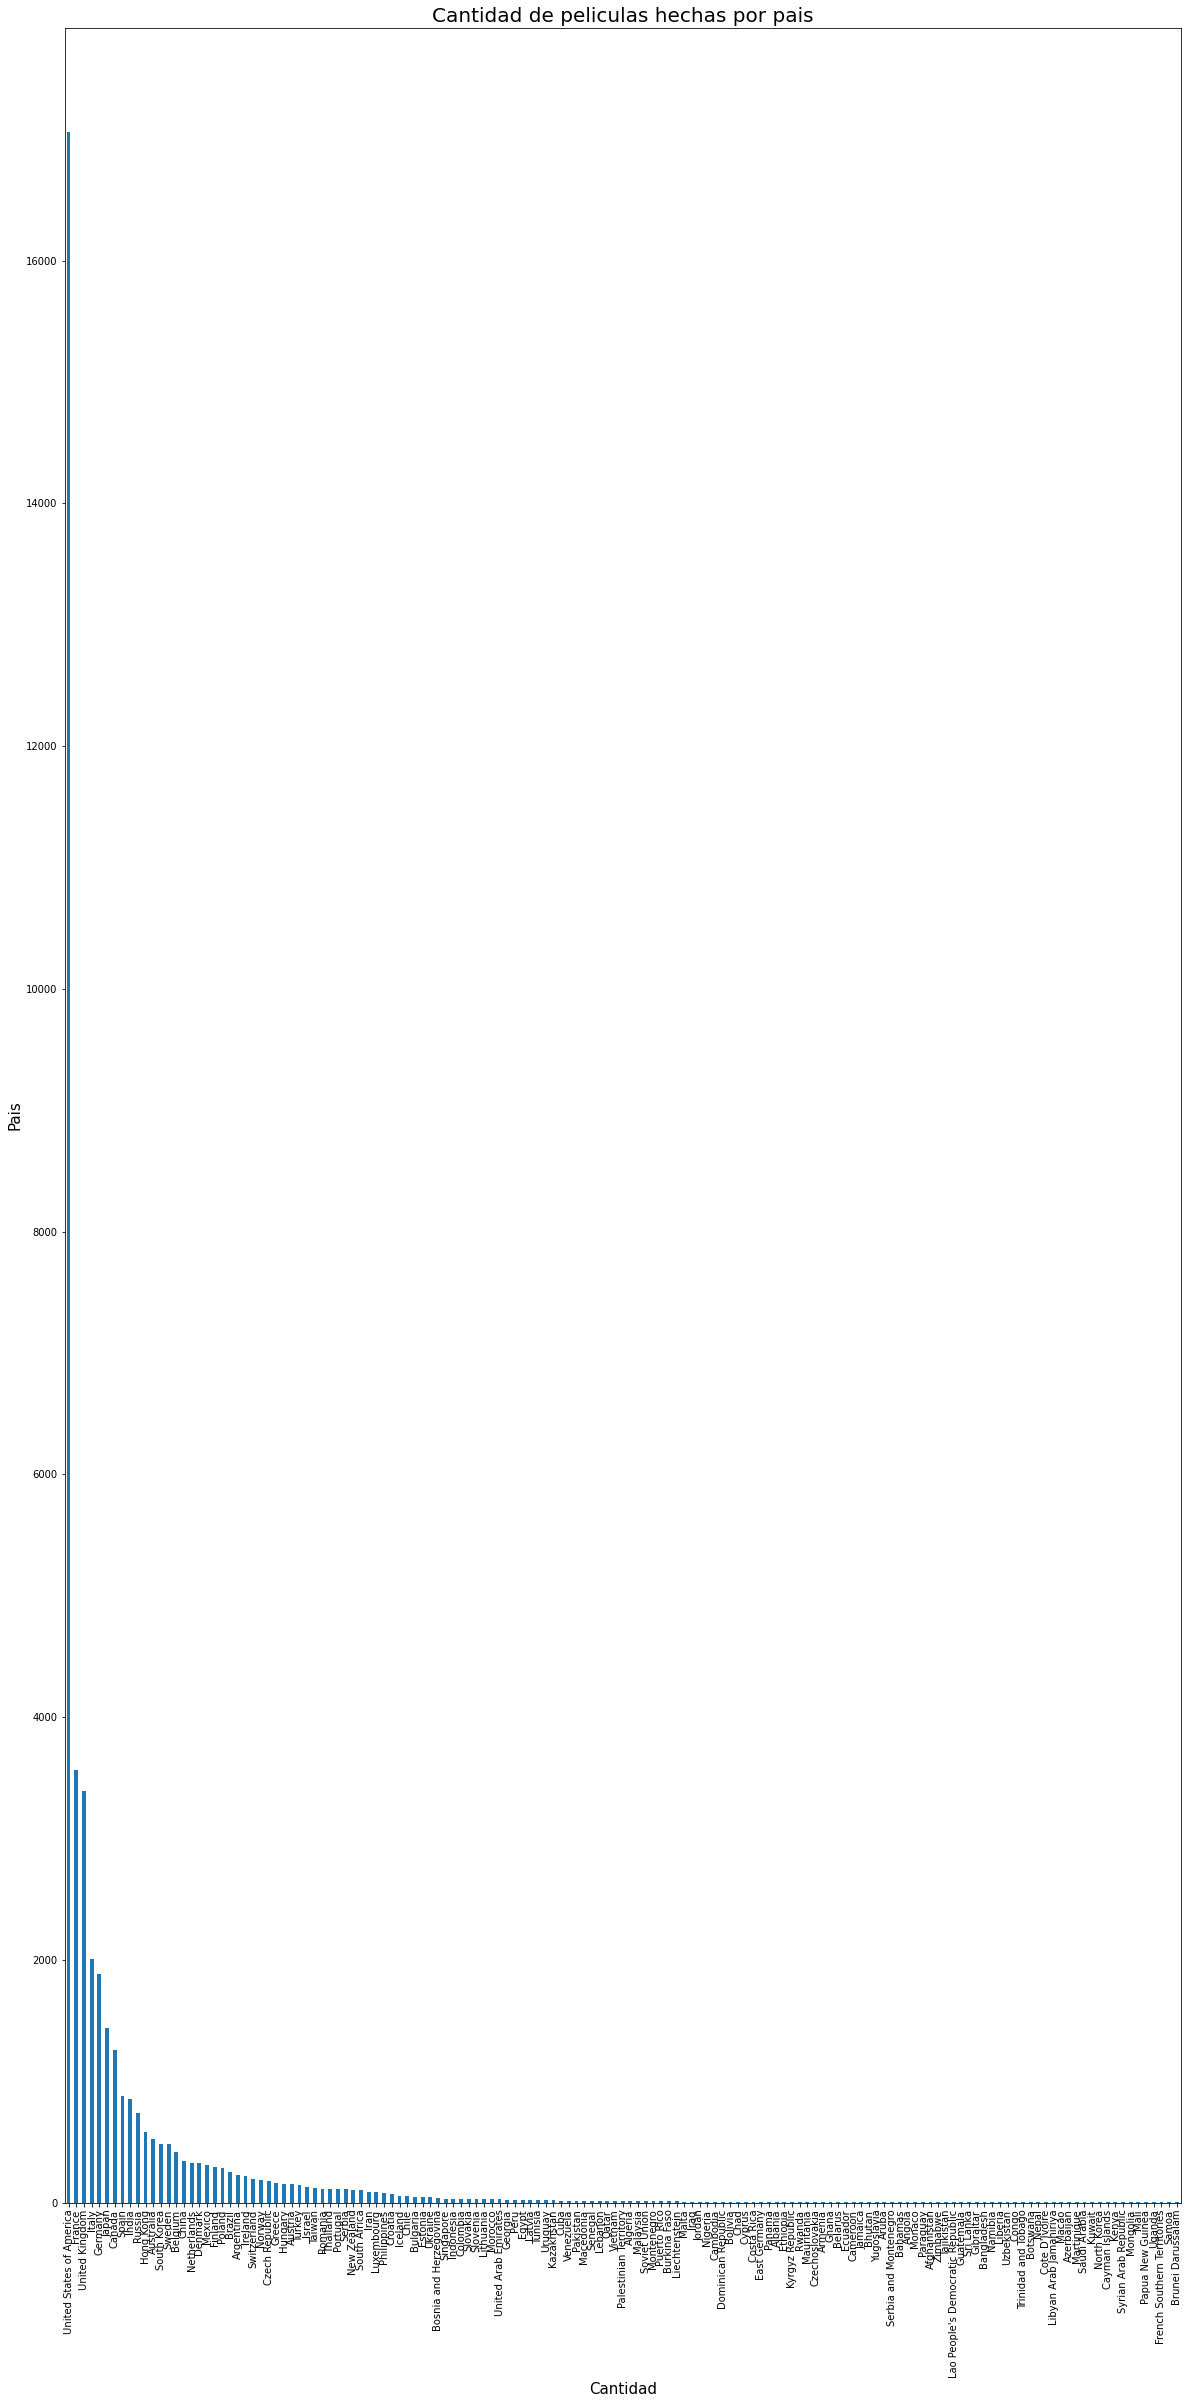

In [17]:
#grafico de cuantas peliculas en un pais se generan
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = peliculas_pais_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas hechas por pais', fontsize = 20)
plt.ylabel('Pais', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

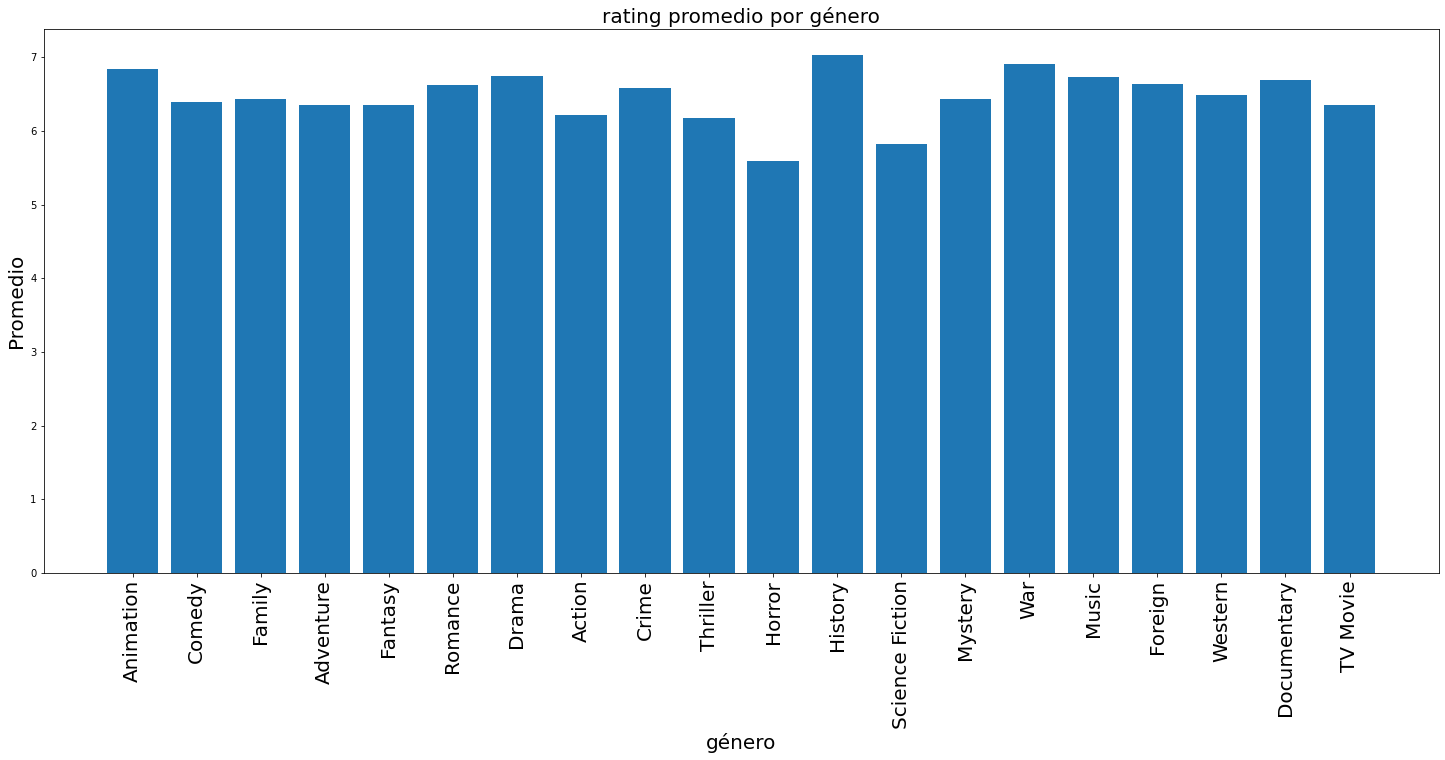

0.583528995513916


In [18]:
start = time.time()
genres = {}
for genre in movie_ratings_2['genres']:
    for g in genre.split(','):
        if g not in genres:
            genres[g] = []

for ind in movie_ratings_2.index:
    gen = movie_ratings_2['genres'][ind].split(',')
    for g in gen:
        genres[g].append(movie_ratings_2['mean_vote'][ind])

for genre in genres:
    genres[genre] = sum(genres[genre])/len(genres[genre])

names = list(genres.keys())
values = list(genres.values())

fig = plt.figure(figsize=(25,10))
plt.bar(range(len(genres)), values, tick_label=names)
plt.xticks(rotation=90, fontsize = 20)
plt.title('rating promedio por género', fontsize = 20)
plt.ylabel('Promedio', fontsize = 20)
plt.xlabel('género', fontsize = 20)
plt.show()
end = time.time()
print(end - start)

In [27]:
# ocupamos tittle y el ano para poder hacer merge con el dataset de los oscars 
title = movie_ratings_2['title'].to_list()
ano = movie_ratings_2['year'].to_list()
pelicula_ano = []
for i in range(len(title)):
    movie= title[i]
    year = ano[i]
    movie_year = f'{movie}[{year}]'
    pelicula_ano.append(movie_year)
movie_ratings_2['Pelicula'] = pelicula_ano
columns = ['Pelicula','runtime','genres','mean_vote']
movies_ratings_2_merge = movie_ratings_2[columns]
movies_ratings_2_merge.head()

,Pelicula,runtime,genres,mean_vote
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2
4,Father of the Bride Part II[1995],106.0,Comedy,6.2


In [28]:
# hacemos el merge segun el title con los oscars
movie_oscars = pd.merge(movies_ratings_2_merge, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars = movie_oscars.dropna().reset_index(drop=True)
print(movie_oscars.shape)
movie_oscars.sort_values('Nominaciones', ascending = False).head()

(2447, 6)


,Pelicula,runtime,genres,mean_vote,Nominaciones,Premios
335,Titanic[1997],194.0,"Drama,Romance,Thriller",7.8,14.0,11.0
2409,La La Land[2016],128.0,"Comedy,Drama,Music,Romance",7.9,14.0,6.0
995,Chicago[2002],113.0,"Action,Comedy,Crime,Drama,Music",7.3,13.0,6.0
888,The Lord of the Rings: The Fellowship of the R...,178.0,"Adventure,Fantasy,Action",8.7,13.0,4.0
141,Gone with the Wind[1939],238.0,"Drama,Romance,War",8.1,13.0,8.0


In [29]:
"""
Descargamos geodataset para relacionar país con calidad y recepción de producciones.
Sjoin debe ser por columna "sovereight"
"""
url = 'https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=America/Santo_Domingo&lang=en'
gdf_paises = gpd.read_file(url)
gdf_paises

,labelrank,woe_id,pop_est,sovereignt,wikidataid,continent,max_label,brk_name,name_ko,name_id,...,iso_a3_eh,min_label,name_hu,abbrev,name_hi,note_adm0,note_brk,formal_fr,name_alt,geometry
0,3,23424891,17885245,Mali,Q912,Africa,7.0,Mali,말리,Mali,...,MLI,3.0,Mali,Mali,माली,None,None,None,None,"POLYGON ((-11.51394 12.44299, -11.46790 12.754..."
1,5,28289408,4543126,Israel,Q23792,Asia,9.5,Palestine,팔레스타인,Palestina,...,PSE,4.5,Palesztina,Pal.,फ़िलिस्तीनी राज्यक्षेत्र,Partial self-admin.,Partial self-admin.,None,None,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
2,3,23424887,3068243,Mongolia,Q711,Asia,7.0,Mongolia,몽골,Mongolia,...,MNG,3.0,Mongólia,Mong.,मंगोलिया,None,None,None,None,"POLYGON ((87.75126 49.29720, 88.80557 49.47052..."
3,4,23424961,8468555,Tajikistan,Q863,Asia,9.0,Tajikistan,타지키스탄,Tajikistan,...,TJK,4.0,Tádzsikisztán,Tjk.,ताजिकिस्तान,None,None,None,None,"POLYGON ((67.83000 37.14499, 68.39203 38.15703..."
4,3,23424923,38476269,Poland,Q36,Europe,7.0,Poland,폴란드,Polandia,...,POL,3.0,Lengyelország,Pol.,पोलैंड,None,None,None,None,"POLYGON ((23.48413 53.91250, 23.52754 53.47012..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,6,23424821,2051363,Gambia,Q1005,Africa,10.0,Gambia,감비아,Gambia,...,GMB,5.0,Gambia,Gambia,गाम्बिया,None,None,None,None,"POLYGON ((-16.71373 13.59496, -15.62460 13.623..."
173,3,23424855,39192111,Iraq,Q796,Asia,7.5,Iraq,이라크,Irak,...,IRQ,3.0,Irak,Iraq,इराक़,None,None,None,None,"POLYGON ((39.19547 32.16101, 38.79234 33.37869..."
174,2,23424922,204924861,Pakistan,Q843,Asia,7.0,Pakistan,파키스탄,Pakistan,...,PAK,3.0,Pakisztán,Pak.,पाकिस्तान,None,None,None,None,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
175,6,23424773,443593,Brunei,Q921,Asia,9.0,Brunei,브루나이,Brunei Darussalam,...,BRN,4.0,Brunei,Brunei,ब्रुनेई,None,None,None,None,"POLYGON ((115.45071 5.44773, 115.40570 4.95523..."
